### Import stuff

In [9]:
import numpy as np
import gvar as gv
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['figure.figsize']  = (6.75, 6.75/1.618034333)
mpl.rcParams['font.size']  = 20
mpl.rcParams['legend.fontsize'] =  16
mpl.rcParams["lines.markersize"] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

sys.path.append('../')
import fitter.model_average as md

def save_fig(fig, filename):

    project_path = os.path.normpath(os.path.join(os.getcwd(), os.pardir))
    if not os.path.exists(os.path.normpath(project_path+'/tmp/')):
        os.makedirs(os.path.normpath(project_path+'/tmp/'))

    filepath = project_path+'/tmp/'+filename+'.pdf'
    fig.savefig(filepath, transparent=True, bbox_inches='tight')
    print('Saving to', filepath)
    return fig

from importlib import reload
reload(md)

<module 'fitter.model_average' from '../fitter/model_average.py'>

### Specify fits to compare in model breakdown plot

In [10]:
collections = {
    'quoted' : '2020_11_22-default_priors',
    
    'emp-1' : '2020_11_22-empirical_order',
    'emp-2' : '2020_11_22-empirical_disc',

    'excld-ms' : '2020_11_22-default_priors_excl_a12m220ms',
    'excld-a06' : '2020_11_22-default_priors_excl_a06m310L'
}
mdl_avg_dict = {clctn : md.model_average(collections[clctn]) for clctn in collections}

for clctn in mdl_avg_dict:
    print(clctn, mdl_avg_dict[clctn].average('w0'))

quoted 0.1710(12)
emp-1 0.1708(14)
emp-2 0.1710(15)
excld-ms 0.1714(12)
excld-a06 0.1694(14)


In [11]:
other_collabs = {
    '2' : {
        'ALPHA [2013]' : gv.gvar('0.1757(13)'),
    },
    '2+1' : {
        'BMWc [2012]' : gv.gvar('0.1755(18)'),
        'HotQCD [2014]' : gv.gvar('0.1749(14)'),
        'RBC [2014]' : gv.gvar('0.17250(91)'),
        'QCDSF-UKQCD [2015]' : gv.gvar('0.1803(25)'),
    },
    '2+1+1' : {
        'HPQCD [2013]' : gv.gvar('0.1715(9)'),
        'MILC [2015]' : gv.gvar('0.1714(15)'),
    },
    '1+1+1+1' : {
        'BMWc [2020]' : gv.gvar('0.17180(39)'),
    },
}

### Make model breakdown plot

Saving to /mnt/storage/google/Documents/School Work/Research/scale-setting/tmp/model_breakdown.pdf


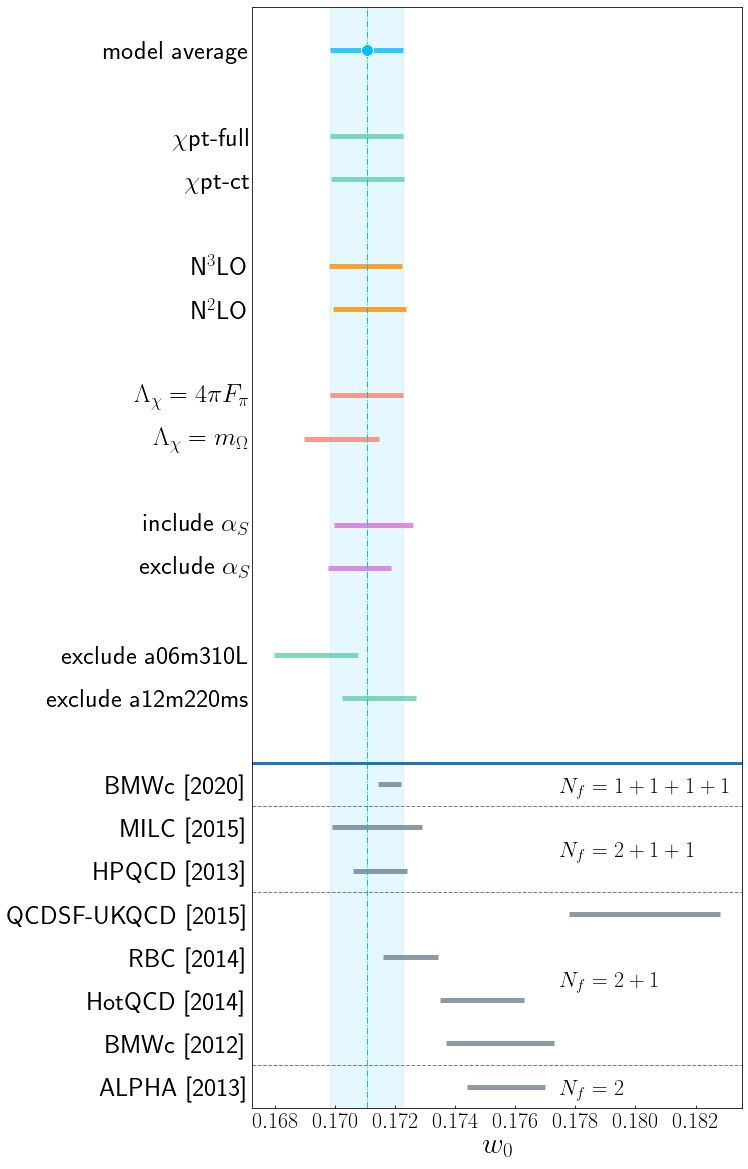

In [13]:
def plot_model_breakdown(mdl_avg_dict):

    main_result_color = 'deepskyblue'
    colors = ['salmon', 'darkorange', 'mediumaquamarine', 'orchid',] 
    y = 0
    y_color = -3
    labels = []

    # For convenience
    def blank_line(label='', **kwargs):
        nonlocal y
        nonlocal labels
        nonlocal y_color
        if label == '':
            y += 1
            y_color +=1
            y_color %= len(colors)
            labels.append('') #(label)
        else:
            pm = lambda g, k : gv.mean(g) + k*gv.sdev(g)
            plt.axhline(y-0.5, ls='--', color='slategrey', **kwargs)
            #plt.text(pm(mdl_avg_dict['quoted'].average('w0'), 1.1), y-1.5, label )

    
    def plot_text(x, y, label):
        plt.text(x, y, label, fontsize=22)


    def amend_plot(value, label, color, starred=False):
        nonlocal y
        nonlocal labels

        x = gv.mean(value)
        xerr = gv.sdev(value)
        plt.errorbar(x=x, y=y, xerr=xerr, yerr=0.0,
                    alpha=0.8, color=color, elinewidth=5.0)
        if starred:
            plt.plot(x, y, color=main_result_color, marker='o',  mec='white', ms=12, zorder=3)
        labels.append(str(label))
        y += 1 
        

    # Initialize
    fig = plt.figure(figsize=(8, 18))
    plt.axes([0.145,0.145,0.85,0.85])

    # Show band
    avg = mdl_avg_dict['quoted'].average('w0')
    pm = lambda g, k : gv.mean(g) + k*gv.sdev(g)
    plt.axvspan(pm(avg, -1), pm(avg, +1), alpha=0.1, color=main_result_color)
    plt.axvline(pm(avg, 0), ls='-.', color=main_result_color)


    # First show other collaborations
    for Nf in other_collabs:
        dy = y
        for collab in (other_collabs[Nf]):
            param_value = other_collabs[Nf][collab]
            amend_plot(param_value, collab, 'slategrey')

        blank_line(r'$N_f = %s$'%Nf)
        plot_text(0.1775, y - 0.75 -(y - dy)/2, r'$N_f = %s$'%Nf)
        #blank_line()

    plt.axhline(y-0.5, lw=3)
    

    
    #blank_line()
    # Show empirical prior
    #amend_plot(mdl_avg_dict['emp-2'].average('w0'), 'empirical priors (2)', colors[y_color])
    #amend_plot(mdl_avg_dict['emp-1'].average('w0'), 'empirical priors (1)', colors[y_color])
    

    # ------
    # Separate
    blank_line()

    amend_plot(mdl_avg_dict['excld-ms'].average('w0'), 'exclude a12m220ms', colors[y_color])
    amend_plot(mdl_avg_dict['excld-a06'].average('w0'), 'exclude a06m310L', colors[y_color])
    

    # ------
    # Separate
    blank_line()

    # exclude alpha_s
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['include_alphas'] == False]
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'exclude $\alpha_S$', colors[y_color])
    #amend_plot(mdl_avg_dict['no_alphas'].average('w0'), r'w/o $\alpha_S$', colors[y_color])

    # include alpha_s
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['include_alphas'] == True]
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'include $\alpha_S$', colors[y_color])
    #amend_plot(mdl_avg_dict['alphas'].average('w0'), r'w/ $\alpha_S$', colors[y_color])
    

    # ------
    # Separate
    #blank_line()


    # ------
    # Separate
    blank_line()

    # chiral cutoff: mO 
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['chiral_cutoff'] == 'mO']
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'$\Lambda_\chi = m_\Omega$', colors[y_color])

    # chiral cutoff: Fpi
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['chiral_cutoff'] == 'Fpi']
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'$\Lambda_\chi = 4 \pi F_\pi$', colors[y_color])


    # ----
    # Separate
    blank_line()

    # n2lo-full fits
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['order'] == 'n2lo']
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'N$^2$LO', colors[y_color])
    #models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() if 'n2lo' in mdl]
    #amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'N$^2$LO', colors[y_color])

    # n3lo-full fits
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['order'] == 'n3lo']
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'N$^3$LO', colors[y_color])
    #models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() if 'n3lo' in mdl]
    #amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'N$^3$LO', colors[y_color])


    # ----
    # Separate
    blank_line()

    # ct only
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['include_log'] == False]
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'$\chi$pt-ct', colors[y_color])
    #amend_plot(mdl_avg_dict['ct-only'].average('w0'), r'$\chi$pt-ct', colors[y_color])

    # xpt only
    models = [mdl for mdl in mdl_avg_dict['quoted'].get_model_names() 
        if mdl_avg_dict['quoted']._get_model_info_from_name(mdl)['include_log'] == True]
    amend_plot(mdl_avg_dict['quoted'].average('w0', models=models), r'$\chi$pt-full', colors[y_color])
    #amend_plot(mdl_avg_dict['xpt-only'].average('w0'), r'$\chi$pt-full', colors[y_color])

    # Separate
    blank_line()
    amend_plot(mdl_avg_dict['quoted'].average('w0'), r'model average', main_result_color, True)






    # Format axes
    plt.xticks(fontsize=22)
    plt.yticks(range(len(labels)), labels)
    plt.tick_params(axis='y', left=False, labelsize=26)
    plt.ylim(-0.5, y)
    plt.xlabel('$w_0$', fontsize=30)
    plt.tight_layout()

    #fig = plt.gcf()
    plt.close()

    return fig

save_fig(plot_model_breakdown(mdl_avg_dict), 'model_breakdown')
    

### Plot all fits

In [5]:
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit
reload(fm)

def save_fit_figs(model_average):
    highest_weight_model = model_average.get_model_names(by_weight=True)[0]

    data_loader = dl.data_loader(model_average.collection)
    bs_data = data_loader.bs_data
    model_info = data_loader.get_model_info_from_name(highest_weight_model)
    prior = data_loader.get_prior(model=highest_weight_model)
    phys_point_data = data_loader.phys_point_data
    
    fit_manager = fm.fit_manager(
        phys_point_data=phys_point_data, 
        bs_data=bs_data, 
        model_info=model_info,
        prior=prior)

    save_fig(fit_manager.plot_fit('a', show_legend=True, ylim=(1.35, 1.55)), 'best_fit_vs_a')
    save_fig(fit_manager.plot_fit('pi', show_legend=False, ylim=(1.35, 1.55), ), 'best_fit_vs_l')

save_fit_figs(mdl_avg_dict['quoted'])

Using default prior for Fpi_n3lo_log_log2_fv
Making fit...
Time (s):  0.5124578475952148
Saving to /mnt/storage/google/Documents/School Work/Research/scale-setting/tmp/best_fit_vs_a.pdf
Saving to /mnt/storage/google/Documents/School Work/Research/scale-setting/tmp/best_fit_vs_l.pdf


In [55]:
def format_table(model_average):

    fit_results = model_average.fit_results

    output = '''\
    \\begin{ruledtabular} \\centering
    \\begin{tabular}{ l c c c c}
    Model & $w_0$ & $w_0 m_\Omega$ & \\texttt{logGBF} & $\chi_\\nu$ & $Q$ & weight \\\ \\midrule[0.5pt]
    '''

    calculate_weight = lambda model_k : np.exp(fit_results[model_k]['logGBF']) / np.sum([np.exp(fit_results[model_l]['logGBF']) for model_l in list(fit_results)])


    for j, model in enumerate(sorted(list(fit_results), key = lambda model : -fit_results[model]['logGBF'])):
        #if j%5 == 0:
        #    output += '\\midrule[0.5pt] \n'
            
        results = [fit_results[model][key] for key in ['name', 'w0', 'logGBF', 'chi2/df', 'Q']]

        results.insert(2, fit_results[model]['w0'] *model_average._get_phys_point_data()['mO'] / model_average._get_phys_point_data()['hbarc'])
        results.append(calculate_weight(model))

        output += '\\texttt{{{}}} & {} & {} &{:.2f} & {:.2f} & {:.2f} & {:.3f} \\\ \n'.format(*results).replace('_', '\_').replace('\_log2', '')

    output += '\\midrule[0.5pt] \n'
    output += 'Model Average & {} & & & &'.format('a')


    output += '''\
    \\end{tabular}
    \\end{ruledtabular}
    '''

    return output

print(format_table(mdl_avg_dict['quoted']))

    \begin{ruledtabular} \centering
    \begin{tabular}{ l c c c c}
    Model & $w_0$ & $w_0 m_\Omega$ & \texttt{logGBF} & $\chi_\nu$ & $Q$ & weight \\ \midrule[0.5pt]
    \texttt{Fpi\_n3lo\_log\_alphas} & 0.1710(13) & 1.449(11) &65.35 & 1.05 & 0.40 & 0.079 \\ 
\texttt{Fpi\_n3lo\_log} & 0.1706(11) & 1.4459(90) &65.35 & 1.06 & 0.39 & 0.079 \\ 
\texttt{Fpi\_n3lo\_log\_alphas\_fv} & 0.1710(13) & 1.449(11) &65.29 & 1.05 & 0.40 & 0.075 \\ 
\texttt{Fpi\_n3lo\_alphas} & 0.1711(13) & 1.450(11) &65.29 & 1.07 & 0.37 & 0.075 \\ 
\texttt{Fpi\_n3lo\_alphas\_fv} & 0.1711(13) & 1.450(11) &65.29 & 1.07 & 0.37 & 0.075 \\ 
\texttt{Fpi\_n3lo\_log\_fv} & 0.1706(11) & 1.4459(90) &65.29 & 1.06 & 0.38 & 0.075 \\ 
\texttt{Fpi\_n3lo} & 0.1706(10) & 1.4462(89) &65.28 & 1.08 & 0.36 & 0.074 \\ 
\texttt{Fpi\_n3lo\_fv} & 0.1706(10) & 1.4462(89) &65.28 & 1.08 & 0.36 & 0.074 \\ 
\texttt{Fpi\_n2lo\_log\_alphas} & 0.1711(13) & 1.450(11) &64.99 & 1.11 & 0.32 & 0.056 \\ 
\texttt{Fpi\_n2lo\_log} & 0.1707(11) & 1.4467(89) 